<a href="https://colab.research.google.com/github/DiegoCorona/TensorFlow2-for-Deep-Learning/blob/main/Week3_Probabilistic_Deep_Learning_with_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.5.0
TFP version: 0.13.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [ ]:
# Define base distribution
normal = tfd.Normal(loc = 0., scale = 1.)

In [ ]:
# Sample from base distribution
n = 1000
z = normal.sample(n)

### Scale and shift bijector

In [ ]:
# Define scale and shift
scale = 4.5
shift = 7

In [ ]:
# Define chain bijector
scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])

In [ ]:
# We can also use call methods
scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)

In [ ]:
# Apply the forward transformation
x = scale_and_shift.forward(z)

In [ ]:
# Check the forward transformation
tf.norm(x - (scale*z + shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

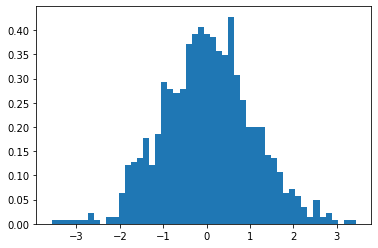

In [ ]:
# Plot z density
plt.hist(z, bins=50, density=True)
plt.show()

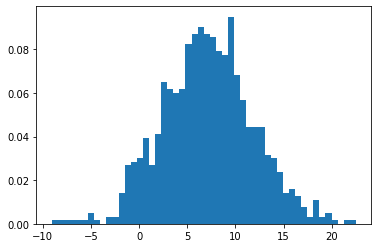

In [ ]:
# Plot x density
plt.hist(x, bins=50, density=True)
plt.show()

#### Inverse transformation

In [ ]:
# Apply inverse transformation
inv_x = scale_and_shift.inverse(x)

In [ ]:
# Check inverse transformation
tf.norm(inv_x - z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [ ]:
# Compute log prob for x
log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[-2.4606488 -3.0335124 -4.0732265 -3.5552273 -3.5321825 -2.5973573
 -2.955226  -2.7245567 -2.4405935 -3.139039  -3.0994036 -2.765924
 -2.4267287 -3.2910123 -2.4418674 -2.4443517 -2.4938195 -2.4676063
 -2.616469  -3.5099843 -2.4583616 -2.4906943 -2.4808784 -2.5385098
 -2.7491379 -2.6137145 -2.5395653 -2.9539797 -2.550901  -2.426579
 -2.6908839 -3.3146958 -2.4992309 -2.45472   -2.746387  -2.4230435
 -2.792188  -2.891767  -2.4731045 -2.4552977 -2.444586  -4.1603346
 -3.6961098 -2.455887  -3.684349  -5.098137  -2.599892  -2.6407728
 -2.8148804 -2.4260774 -3.646817  -3.0504189 -2.732198  -3.8324227
 -2.4237173 -2.4230614 -2.423719  -2.9028087 -2.4361286 -2.4249182
 -3.4975877 -2.6051478 -2.4673824 -2.844355  -2.615459  -2.6926975
 -3.9395142 -2.435664  -2.7671065 -2.4732876 -2.5328395 -2.4313073
 -2.487856  -3.041581  -2.709273  -2.4981198 -2.5868754 -2.5634613
 -3.3680818 -2.438188  -2.4358609 -2.9180377 -3.1791644 -3.5319023
 -4.059925  -2.42486   -2.5401168 -2.744154  -2.42304

In [ ]:
# We can also use the inverse transformation
log_prob_X = (normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0))
print(log_prob_X)

tf.Tensor(
[-2.4606488 -3.0335124 -4.0732265 -3.5552273 -3.5321825 -2.5973573
 -2.955226  -2.7245567 -2.4405935 -3.139039  -3.0994036 -2.765924
 -2.4267287 -3.2910123 -2.4418674 -2.4443517 -2.4938195 -2.4676063
 -2.616469  -3.5099843 -2.4583616 -2.4906943 -2.4808784 -2.5385098
 -2.7491379 -2.6137145 -2.5395653 -2.9539797 -2.550901  -2.426579
 -2.6908839 -3.3146958 -2.4992309 -2.45472   -2.746387  -2.4230435
 -2.792188  -2.891767  -2.4731045 -2.4552977 -2.444586  -4.1603346
 -3.6961098 -2.455887  -3.684349  -5.098137  -2.599892  -2.6407728
 -2.8148804 -2.4260774 -3.646817  -3.0504189 -2.732198  -3.8324227
 -2.4237173 -2.4230614 -2.423719  -2.9028087 -2.4361286 -2.4249182
 -3.4975877 -2.6051478 -2.4673824 -2.844355  -2.615459  -2.6926975
 -3.9395142 -2.435664  -2.7671065 -2.4732876 -2.5328395 -2.4313073
 -2.487856  -3.041581  -2.709273  -2.4981198 -2.5868754 -2.5634613
 -3.3680818 -2.438188  -2.4358609 -2.9180377 -3.1791644 -3.5319023
 -4.059925  -2.42486   -2.5401168 -2.744154  -2.42304

### Broadcasting

In [ ]:
x = tf.random.normal(shape=(100, 1))

In [ ]:
# Softfloor bijector
softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [ ]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.2, 1.])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


In [ ]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1])

In [ ]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

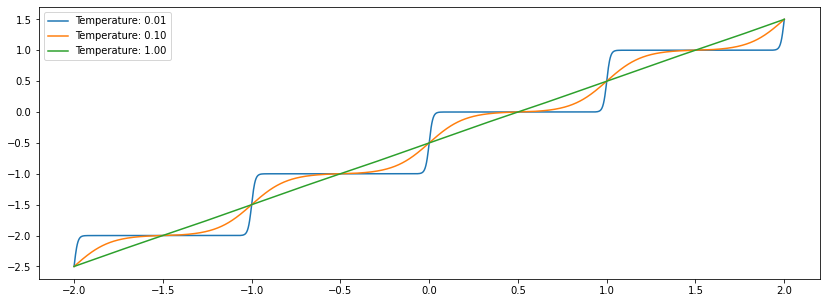

In [ ]:
# Plot
x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(3, softfloor, ['temperature'], x)

In [ ]:
# Gumbel bijector using broadcasting
exps = tfb.GumbelCDF(loc = [0.5, 1, 1.5, 2, 3], scale = [1,2,2,3,4])

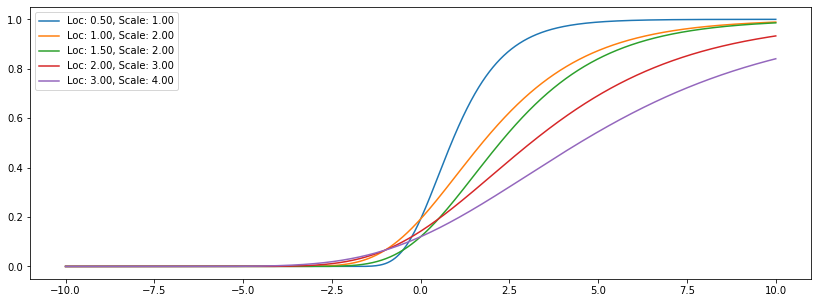

In [ ]:
# Plot
x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5, exps, ['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [ ]:
# Parameters
n = 10000
loc = 0
scale = 0.5

In [ ]:
# Normal distribution
normal = tfd.Normal(loc=loc, scale=scale)

In [ ]:
# Display event and batch shape
print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Exponential bijector
exp = tfb.Exp()

In [ ]:
# Log normal transformed distribution using exp and normal bijectors
log_normal_td = exp(normal)

In [ ]:
# Display event and batch shape
print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Base distribution
z = normal.sample(n)

#### Plots

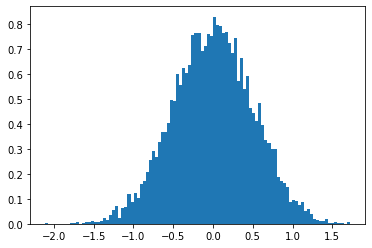

In [ ]:
# Plot z density
plt.hist(z, bins = 100, density = True)
plt.show()

In [ ]:
# Transformed distribution
x = log_normal_td.sample(n)

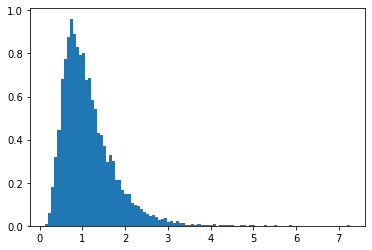

In [ ]:
# Plot x density
plt.hist(x, bins = 100, density = True)
plt.show()

In [ ]:
# Define log normal distribution
log_normal = tfd.LogNormal(loc = loc, scale = scale)

In [ ]:
# Sample log_normal
l = log_normal.sample(n)

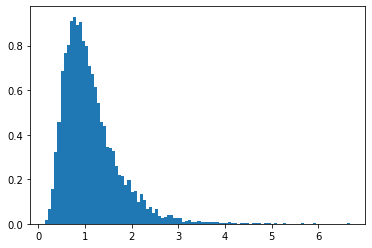

In [ ]:
# Plot l density
plt.hist(l, bins = 100, density = True)
plt.show()

#### Log probability

In [ ]:
# Log prob of LogNormal
log_prob = log_normal_td.log_prob(x)

In [ ]:
# Log prob of log normal transformed distribution
log_prob_td = log_normal.log_prob(x)

In [ ]:
# Check log probs
tf.norm(log_prob_td - log_prob)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

### Event shape and batch shape

In [ ]:
# Set a scaling lower triangular matrix
tril = tf.random.normal((2, 4, 4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)

In [ ]:
# View of scale_low_tri
scale_low_tri.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-0.86763924,  0.        ,  0.        ,  0.        ],
        [ 0.42359525, -0.65008634,  0.        ,  0.        ],
        [ 2.9624138 , -0.8409473 , -1.1936032 ,  0.        ],
        [ 0.38203776, -0.409192  , -0.31787264, -0.6219512 ]],

       [[ 0.6276661 ,  0.        ,  0.        ,  0.        ],
        [ 0.13108233,  0.75489557,  0.        ,  0.        ],
        [-0.5166783 , -0.8365572 ,  0.8883296 ,  0.        ],
        [-0.8729835 ,  0.128599  , -0.47598112, -1.3854172 ]]],
      dtype=float32)>

In [ ]:
# Define scale linear operator
scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)

In [ ]:
# Define scale linear operator transformed distribution with a batch and event shape
mvn = tfd.TransformedDistribution(normal, scale_lin_op, batch_shape = [2]) ## Batch_shape and event_shape parameters had nor available
print(mvn)

In [ ]:
# Display event and batch shape



In [ ]:
# Sample



In [ ]:
# Define a MultivariateNormalLinearOperator distribution
mvn2 = tfd.MultivariateNormalLinearOperator(loc = 0., scale = scale_low_tri)
print(mvn2)

tfp.distributions.MultivariateNormalLinearOperator("MultivariateNormalLinearOperator", batch_shape=[2], event_shape=[4], dtype=float32)


In [ ]:
# Display event and batch shape
print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [ ]:
# Sample
y2 = mvn2.sample(sample_shape=(n,))
print(y2.shape)

(10000, 2, 4)


***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [ ]:
# Define a new bijector: Cubic
class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args = False, name = 'Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__ \
            (validate_args = validate_args, forward_min_event_ndims = 0, name = name)

    def _forward(self, x):
        x = tf.cast(x, tf.float32)
        return tf.squeeze(tf.pow(self.a * x + self.b, 3))

    def _inverse(self, y):
        y = tf.cast(y, tf.float32)
        return (tf.math.sign(y) * tf.pow(tf.abs(y), 1 / 3) - self.b) / self.a

    def _forward_log_det_jacobian(self, x):
        x = tf.cast(x, tf.float32)
        return tf.math.log(3. * tf.abs(self.a)) + 2. * tf.math.log(tf.abs(self.a * x + self.b))

In [ ]:
# Cubic bijector
cubic = Cubic([1.0, -2.0], [-1.0, 0.4], validate_args= True)

In [ ]:
# Apply forward transformation
x = tf.constant([[1,2], [3, 4]])
y = cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [ ]:
# Check inverse
np.linalg.norm(x - cubic.inverse(y))

0.0

#### Function plots

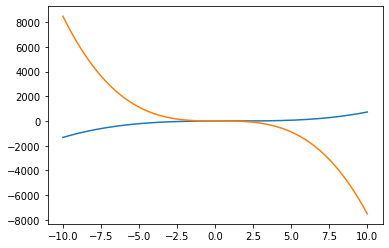

In [ ]:
# Plot the forward transformation
x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x, cubic.forward(x))

In [ ]:
# Display shape
cubic.forward(x).shape

TensorShape([500, 2])

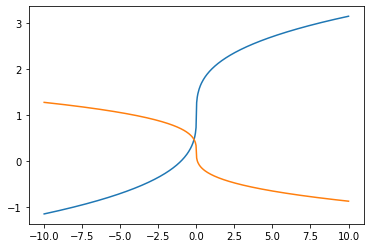

In [ ]:
# Plot the inverse
plt.plot(x, cubic.inverse(x))

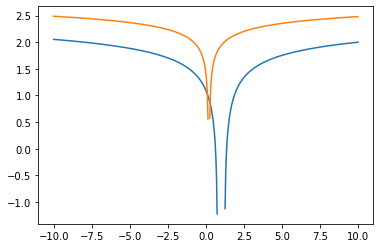

In [ ]:
# Plot the forward log Jacobian determinant
plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))

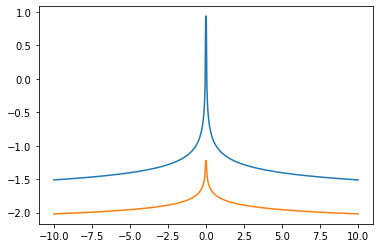

In [ ]:
# Plot the inverse log Jacobian determinant
plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))

#### TransformedDistribution and plots

In [ ]:
# Create a transformed distribution with Cubic
normal = tfd.Normal(loc=[0., 0.], scale=[1., 1.])
ind = tfd.Independent(
    distribution=normal,
    reinterpreted_batch_ndims=1)
print(normal, ind)
cubed_normal = tfd.TransformedDistribution(ind, cubic)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32) tfp.distributions.Independent("IndependentNormal", batch_shape=[], event_shape=[2], dtype=float32)


In [ ]:
# Sample cubed_normal
n = 1000
g = cubed_normal.sample(n)
g.shape

TensorShape([1000, 2])

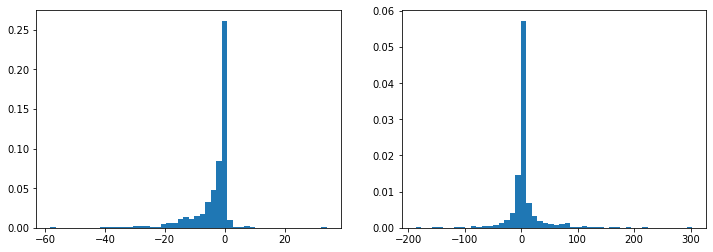

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

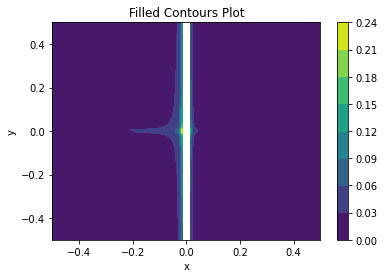

In [ ]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Create a transformed distribution with the inverse of Cube
inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal = inverse_cubic(normal)

In [ ]:
# Samble inv_cubed_normal
n = 1000
g = inv_cubed_normal.sample(n)
g.shape

TensorShape([1000, 2])

In [ ]:
# Make contour plot
xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

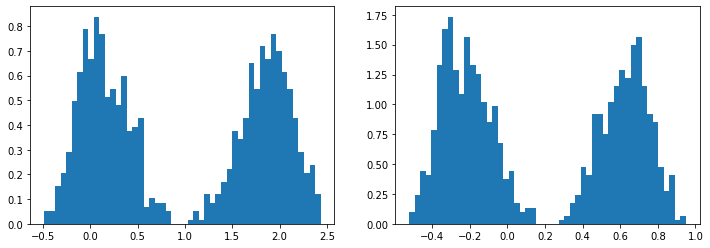

In [ ]:
# Plot histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [ ]:
# Create a mixture of four Gaussians
probs = [0.45, 0.55]
mix_gauss = tfd.Mixture (
    cat = tfd.Categorical(probs = probs),
    components = [tfd.Normal(loc = 2.3, scale = 0.4), tfd.Normal(loc = 0.8, scale = 0.4)]
)

In [ ]:
# Create the dataset
x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


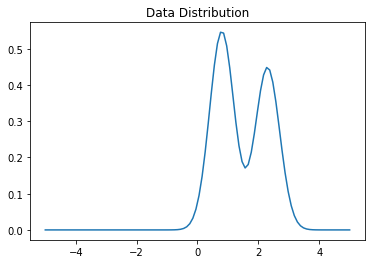

In [ ]:
# Plot the data distribution
x = np.linspace(-5.0, 5.0, 100)
plt.plot(x, mix_gauss.prob(x))
plt.title('Data Distribution')
plt.show()

In [ ]:
# Make a trainable bijector
trainable_inv_cubic = tfb.Invert(Cubic(tf.Variable(0.25), tf.Variable(-0.1),))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [ ]:
# Make a trainable transformed distribution
normal = tfd.Normal(loc = 0., scale = 1.)
trainable_dist = tfd.TransformedDistribution(normal, trainable_inv_cubic)

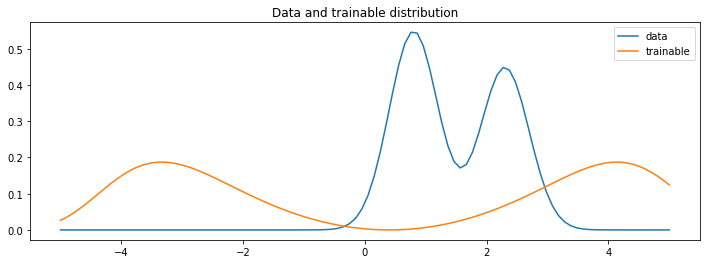

In [ ]:
# Plot the data and learned distributions
x = np.linspace(-5.0, 5.0, 100)
plt.figure(figsize = (12, 4))
plt.plot(x, mix_gauss.prob(x), label = 'data')
plt.plot(x, trainable_dist.prob(x), label = 'trainable')
plt.legend()
plt.title('Data and trainable distribution')
plt.show()

In [ ]:
# Train the bijector

num_epochs = 10
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...


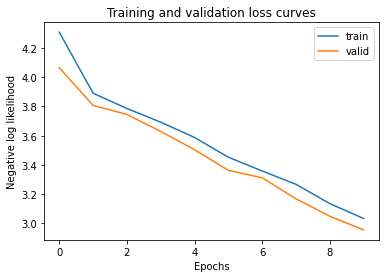

In [ ]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

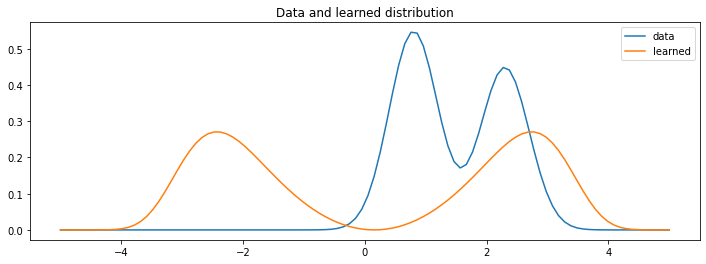

In [ ]:
# Plot the data and learned distributions
x = np.linspace(-5.0, 5.0, 100)
plt.figure(figsize = (12, 4))
plt.plot(x, mix_gauss.prob(x), label = 'data')
plt.plot(x, trainable_dist.prob(x), label = 'learned')
plt.legend()
plt.title('Data and learned distribution')
plt.show()

In [ ]:
# Display trainable variables
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.3616713>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.055808567>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [8]:
!pip install tensorflow_probability==0.9.0
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8 MB 23 kB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 3.8 MB 67.5 MB/s 
     |████████████████████████████████| 448 kB 70.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=9aec0d27bfe37624f748a665d97feb9dd489fec7e1a6cff87f47852b333979b4
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2.0, 2.0)

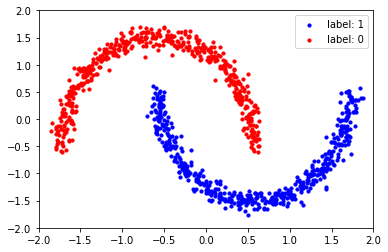

In [4]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
# Define base distribution
base_distribution = tfd.Normal(loc = 0, scale = 1)

In [10]:
# Define the trainable distribution
def make_masked_autorregresive_flow(hidden_units = [16, 16], activation = 'relu'):
  made = tfb.AutoregressiveNetwork(
      params = 2, event_shape = [2], hidden_units = hidden_units, activation = activation)
  return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn= made)

trainable_distribution = tfd.TransformedDistribution(base_distribution,
                                                     make_masked_autorregresive_flow(),
                                                     event_shape = [2])

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [12]:
# Define a plot contour routine
def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

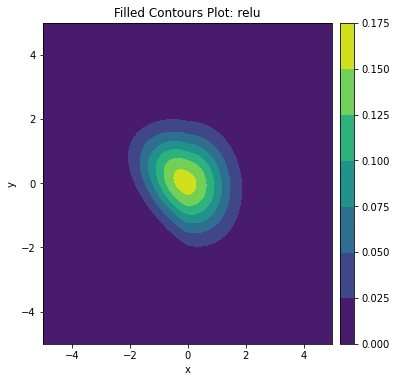

In [14]:
# Plot contour
activation = 'relu'

maf = tfd.TransformedDistribution(base_distribution,
                                  make_masked_autorregresive_flow(activation = activation),
                                  event_shape = [2])

plot_contour_prob([maf], scale_fig=6, title = [activation])

In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [18]:
# Make samples
x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

In [19]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

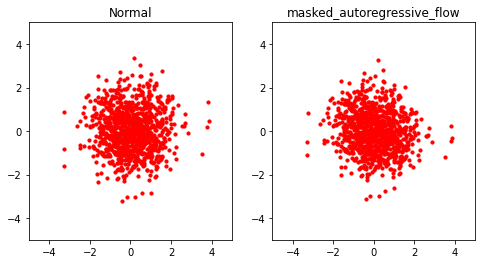

In [20]:
# Plot
_plot(samples)

#### Training a MaskedAutoregressiveFlow bijector

In [21]:
from tensorflow.keras.callbacks import LambdaCallback

In [22]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [23]:
# Train the distribution
history = train_dist_routine(trainable_distribution, n_epochs=500, n_disp=50)


 Epoch 1/500 
	 loss: 2.7697, val_loss: 2.8048

 Epoch 51/500 
	 loss: 2.6741, val_loss: 2.6853

 Epoch 101/500 
	 loss: 2.6398, val_loss: 2.6460

 Epoch 151/500 
	 loss: 2.6086, val_loss: 2.6094

 Epoch 201/500 
	 loss: 2.5558, val_loss: 2.5501

 Epoch 251/500 
	 loss: 2.4696, val_loss: 2.4555

 Epoch 301/500 
	 loss: 2.3500, val_loss: 2.3287

 Epoch 351/500 
	 loss: 2.2450, val_loss: 2.2232

 Epoch 401/500 
	 loss: 2.1890, val_loss: 2.1619

 Epoch 451/500 
	 loss: 2.1527, val_loss: 2.1227


In [24]:
# Get losses
train_losses = history.history['loss']
valid_losses = history.history['val_loss']

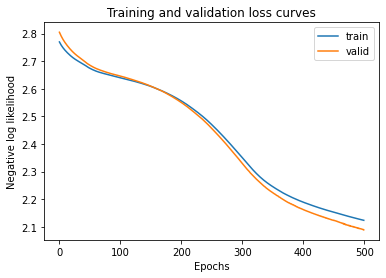

In [25]:
# Plot loss vs epoch
plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [26]:
# Make samples
x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]

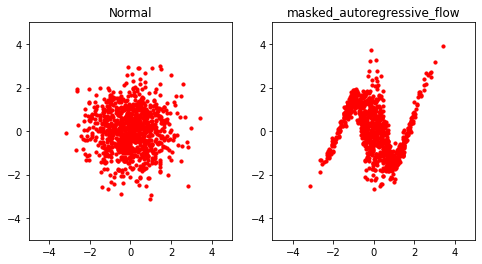

In [27]:
# Plot
_plot(samples)

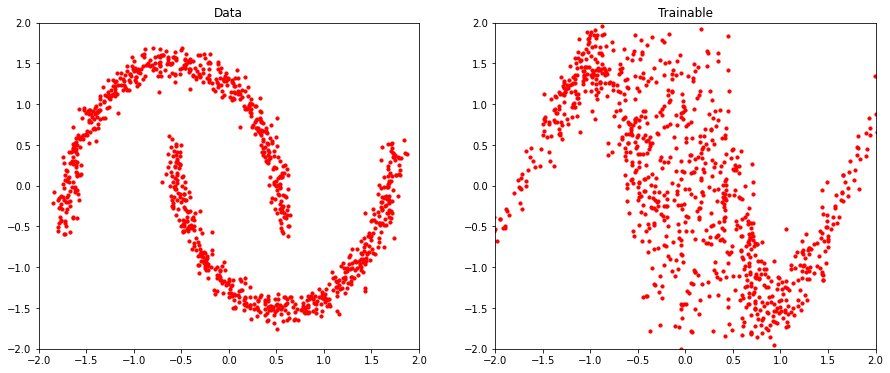

In [28]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

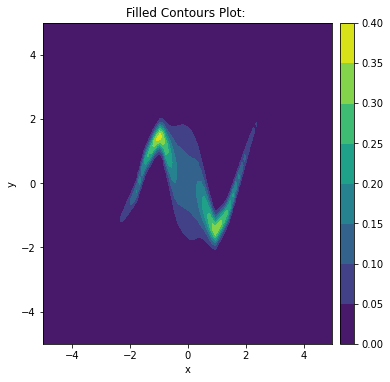

In [29]:
# Plot contour
plot_contour_prob([trainable_distribution], scale_fig= 6)

#### Training a chain of MaskedAutoregressiveFlow bijectors

In [30]:
# Define a more expressive model
num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
  masked_auto_i = make_masked_autorregresive_flow(hidden_units= [256, 256], activation = 'relu')
  bijectors.append(masked_auto_i)
  bijectors.append(tfb.Permute(permutation=[1, 0]))

flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [33]:
# Define the trainable distribution
trainable_distribution = tfd.TransformedDistribution(distribution = base_distribution,
                                                     bijector = flow_bijector,
                                                     event_shape = [2])

In [34]:
# Make samples
def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

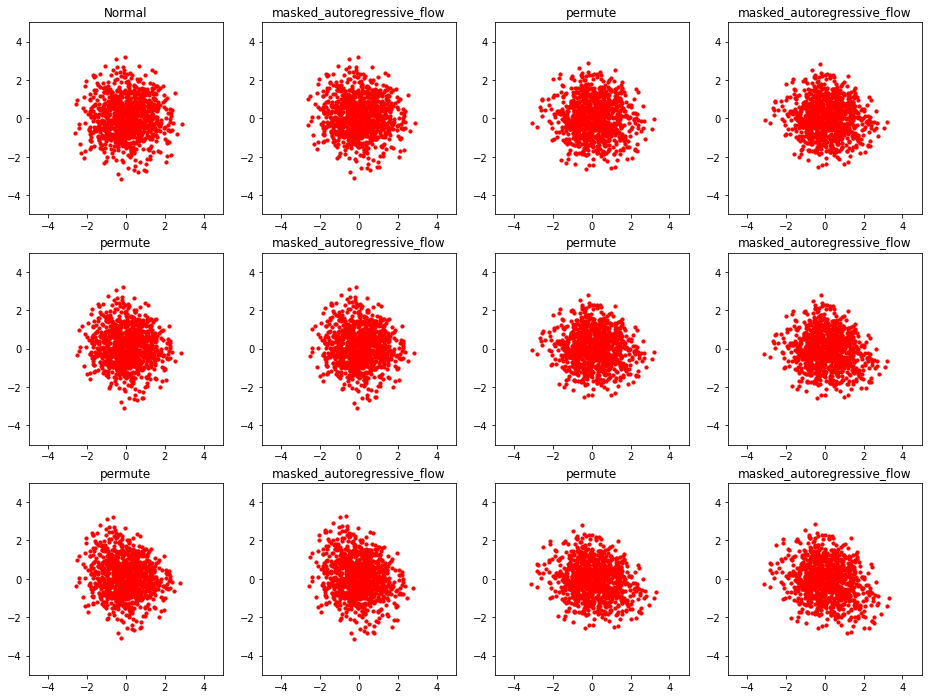

In [35]:
# Plot
_plot(samples, 3)

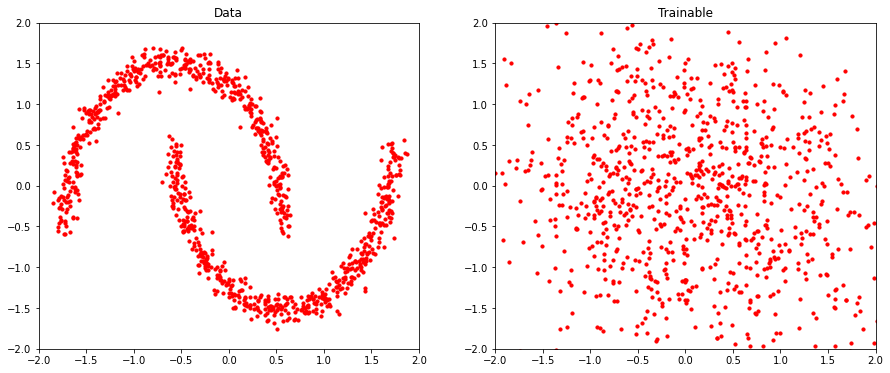

In [36]:
# Plot
visualize_training_data(samples)

In [37]:
# Train the distribution
history = train_dist_routine(trainable_distribution, n_epochs= 600, n_disp= 50)


 Epoch 1/600 
	 loss: 2.7685, val_loss: 2.6965

 Epoch 51/600 
	 loss: 2.0718, val_loss: 2.1032

 Epoch 101/600 
	 loss: 2.0487, val_loss: 2.1436

 Epoch 151/600 
	 loss: 2.3849, val_loss: 2.3475

 Epoch 201/600 
	 loss: 2.9532, val_loss: 2.9984

 Epoch 251/600 
	 loss: 2.6890, val_loss: 2.6965

 Epoch 301/600 
	 loss: 1.7723, val_loss: 1.7432

 Epoch 351/600 
	 loss: 3.8423, val_loss: 3.8489

 Epoch 401/600 
	 loss: 2.4018, val_loss: 2.3712

 Epoch 451/600 
	 loss: 1.9174, val_loss: 1.8982

 Epoch 501/600 
	 loss: 1.4793, val_loss: 1.5371

 Epoch 551/600 
	 loss: 1.3159, val_loss: 2.9123


In [38]:
# Get losses
train_losses = history.history['loss']
valid_losses = history.history['val_loss']

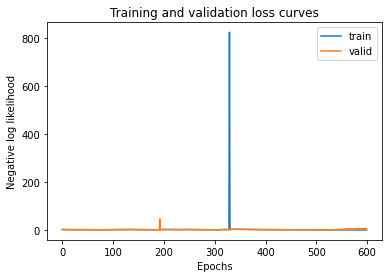

In [39]:
# Plot loss vs epoch
plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

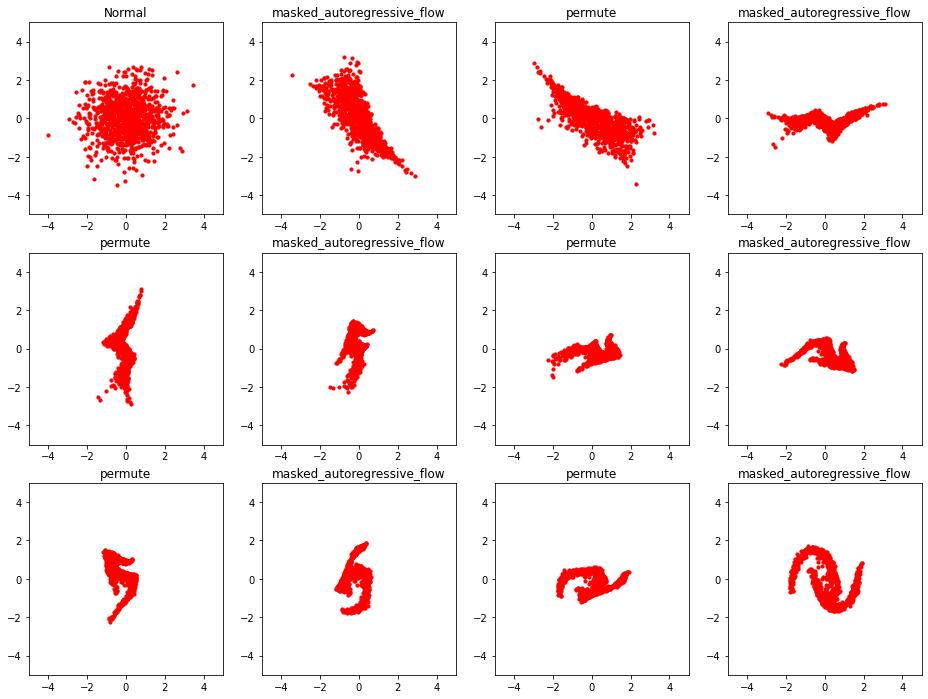

In [40]:
# Make samples and plot
names, samples = make_samples()
_plot(samples, 3)

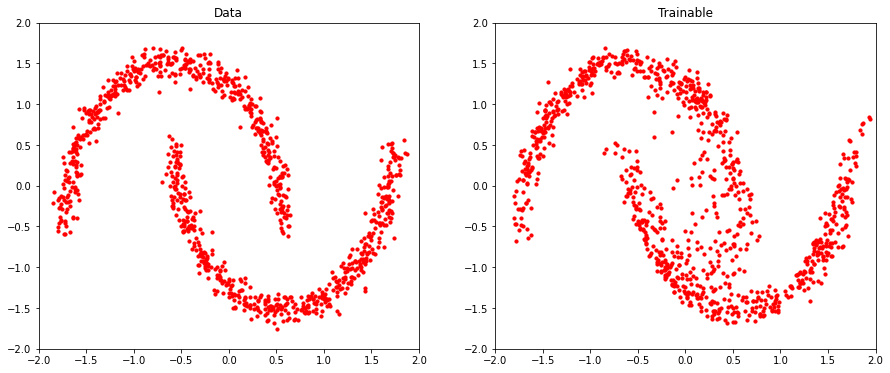

In [41]:
# Plot
visualize_training_data(samples)

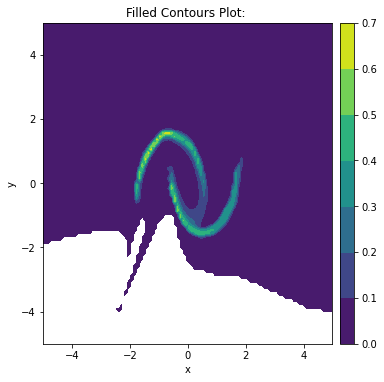

In [42]:
# Plot
plot_contour_prob([trainable_distribution], scale_fig= 6)